# ROC curve

**Motivation**: This script plots ROC curves for predictions given in the file `summary_person`. (This file contains predictions from the final models.)

### load

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from typing import Union

# local
import set_path
import supp.support_load as sl

In [5]:
summary_person = sl.read_csv('summary_person')
print(f'{summary_person.shape}\tshape of summary_person')
summary_person.head()

CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\summary_person.csv
(3836, 21)	shape of summary_person


,ID_person,name,vizier,set,mean,std,max,min,max-min,step_glm_v1,...,lasso_glm_v1,lasso_nn_v1,ridge_glm_v1,ridge_nn_v1,step_glm_v2,step_nn_v2,lasso_glm_v2,lasso_nn_v2,ridge_glm_v2,ridge_nn_v2
0,3697,2nty-kA(.i) : Ixxi,1,Train,0.988122,0.019464,0.999996,0.019464,0.980532,0.996871,...,0.993314,0.999995,0.981437,0.997956,0.995681,0.999996,0.960891,0.999762,0.934575,0.999634
1,2519,NaN,0,Train,0.030128,0.038439,0.120745,0.001220,0.119524,0.001220,...,0.003161,0.016117,0.006171,0.097413,0.001246,0.017145,0.004261,0.050564,0.007107,0.120745
2,424,Ici,0,Train,0.018818,0.018037,0.050536,0.001220,0.049316,0.001220,...,0.003161,0.016117,0.005465,0.035231,0.001246,0.017125,0.004261,0.050536,0.006271,0.048798
3,2091,NaN,0,Train,0.019214,0.018454,0.052918,0.001220,0.051698,0.001220,...,0.003161,0.016117,0.005465,0.035231,0.001246,0.018964,0.004261,0.052918,0.006292,0.049310
4,3882,NaN,0,Train,0.067781,0.100142,0.288917,0.001220,0.287697,0.001220,...,0.004633,0.037132,0.015989,0.275298,0.001246,0.017910,0.004927,0.112132,0.017582,0.288917


In [11]:
true_column = 'vizier'
pred_columns = [
 'step_glm_v1',
 'step_nn_v1',
 'lasso_glm_v1',
 'lasso_nn_v1',
 'ridge_glm_v1',
 'ridge_nn_v1',
 'step_glm_v2',
 'step_nn_v2',
 'lasso_glm_v2',
 'lasso_nn_v2',
 'ridge_glm_v2',
 'ridge_nn_v2'
 ]

In [39]:
mask = summary_person['set']=='Test'
summary_person.loc[mask, 'vizier'].sum()

12

### function

In [33]:
def plot_roc_curve(dataset, true_column, prediction_columns):
    """
    Plots ROC curves for one or more prediction columns.

    Parameters:
    - dataset: pandas DataFrame with true and predicted values
    - true_column: name of the column with ground truth binary labels
    - prediction_columns: name or list of names of columns with predicted probabilities or scores
    """
    if isinstance(prediction_columns, str):
        prediction_columns = [prediction_columns]

    if true_column not in dataset.columns:
        raise ValueError(f"Column '{true_column}' not found in dataset.")

    y_true = dataset[true_column].values

    plt.figure(figsize=(8, 6))

    for col in prediction_columns:
        if col not in dataset.columns:
            raise ValueError(f"Prediction column '{col}' not found in dataset.")

        y_score = dataset[col].values
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.6f}, {col}')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### plots

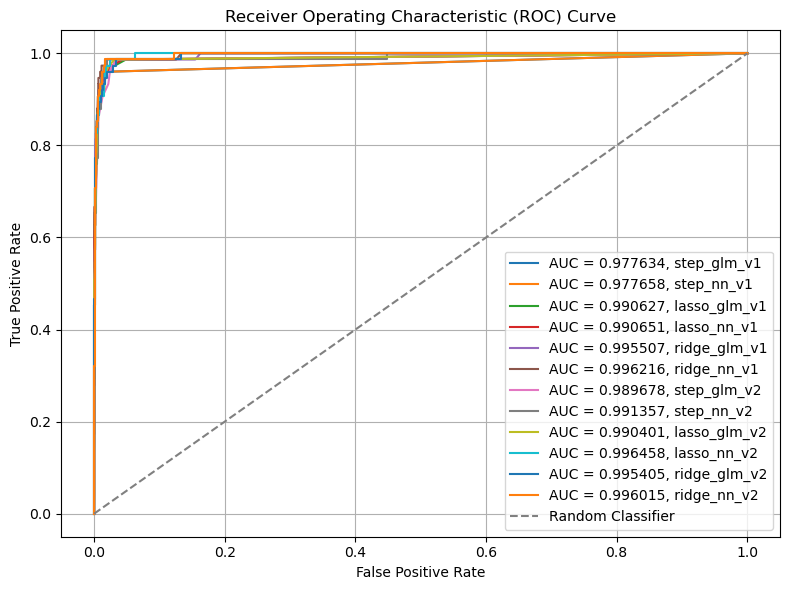

In [34]:
plot_roc_curve(summary_person, true_column, pred_columns)

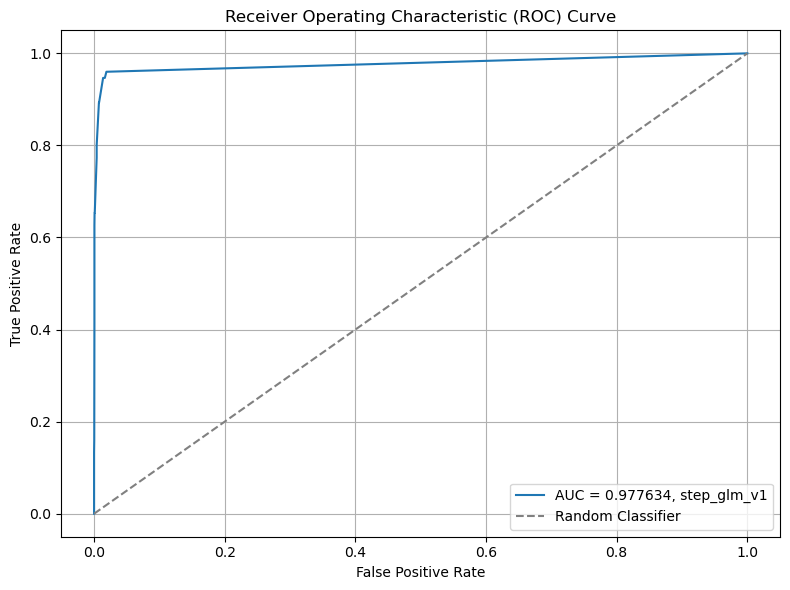

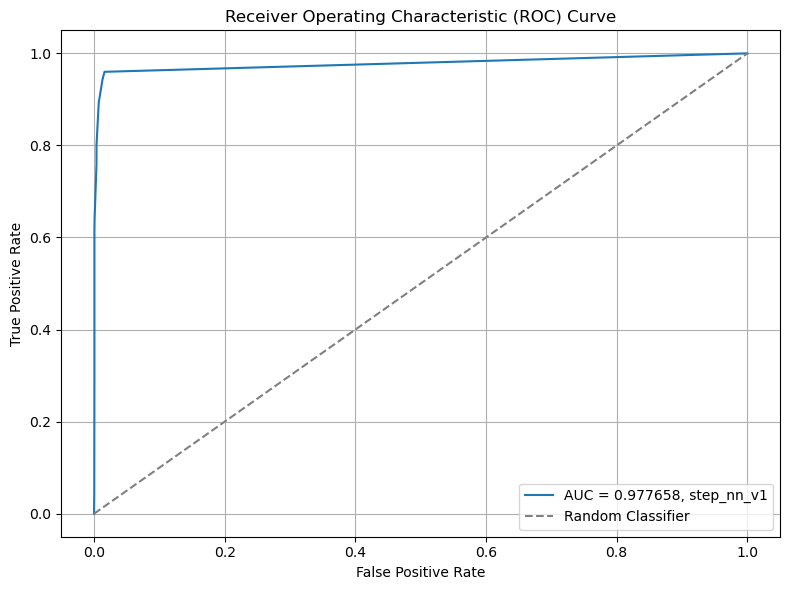

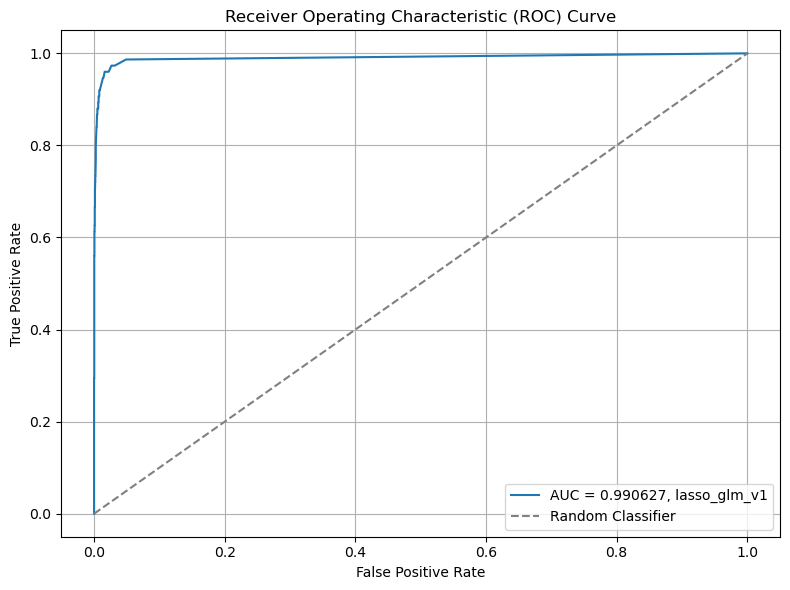

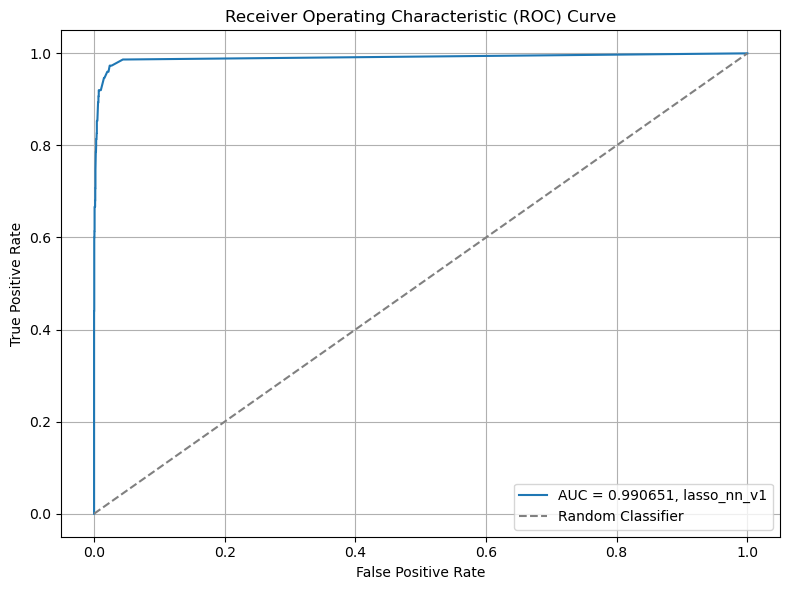

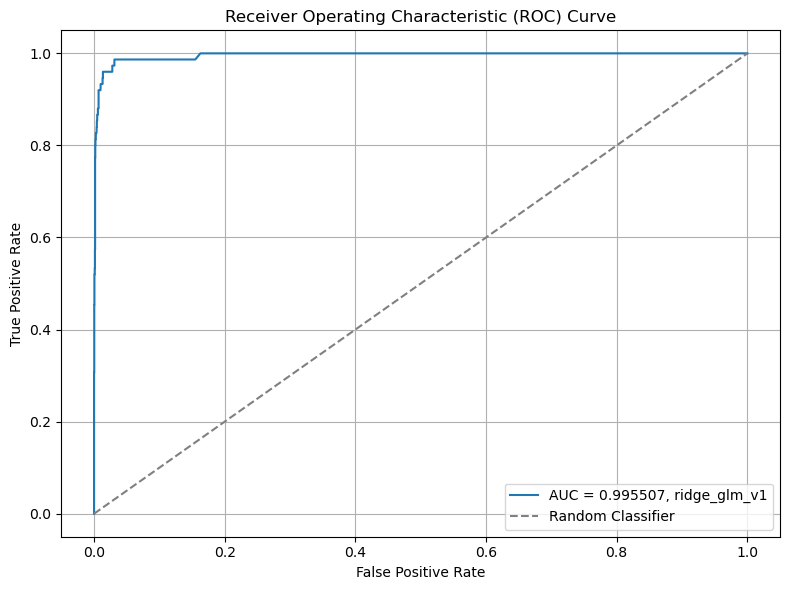

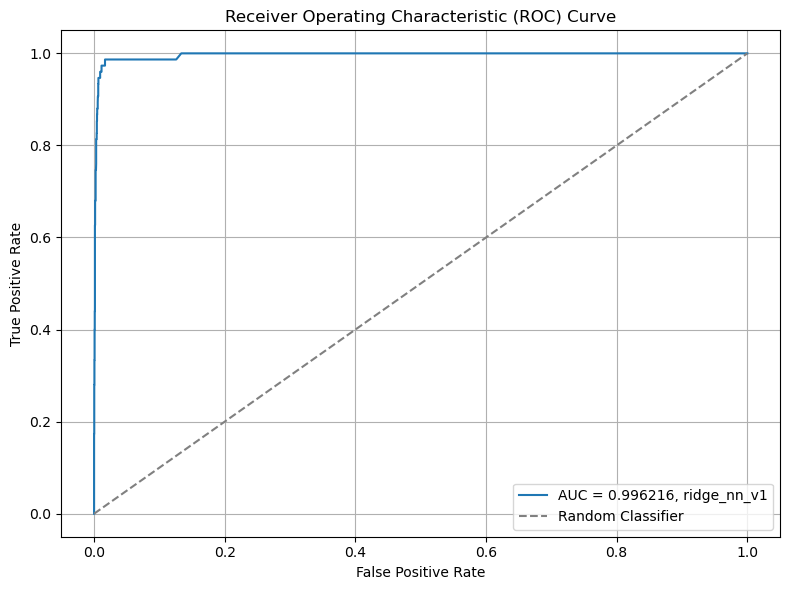

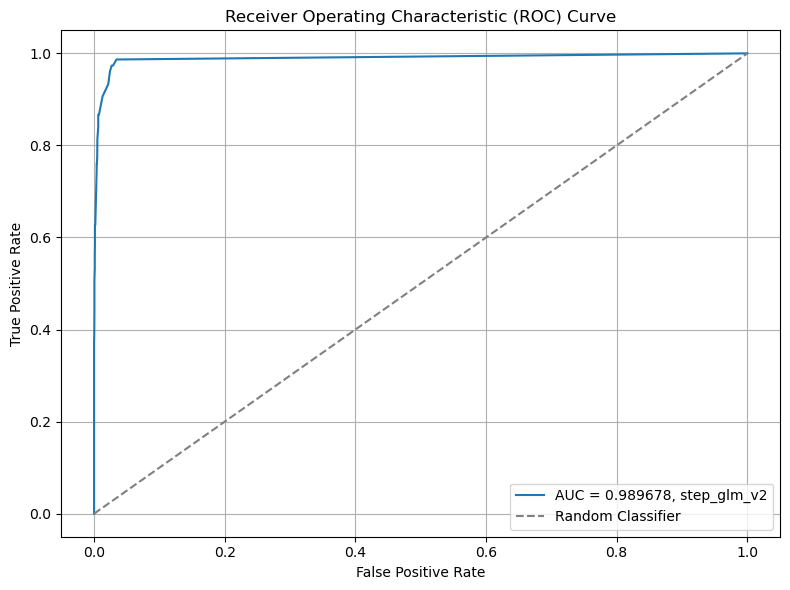

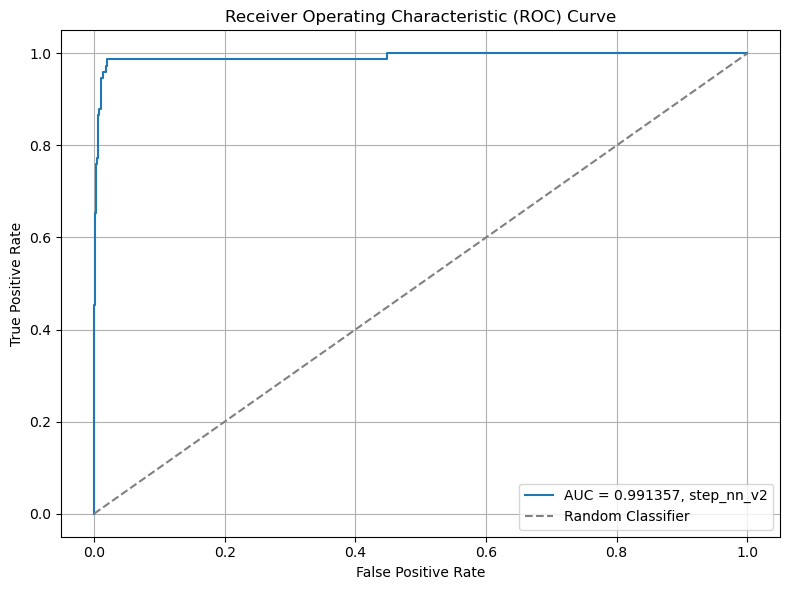

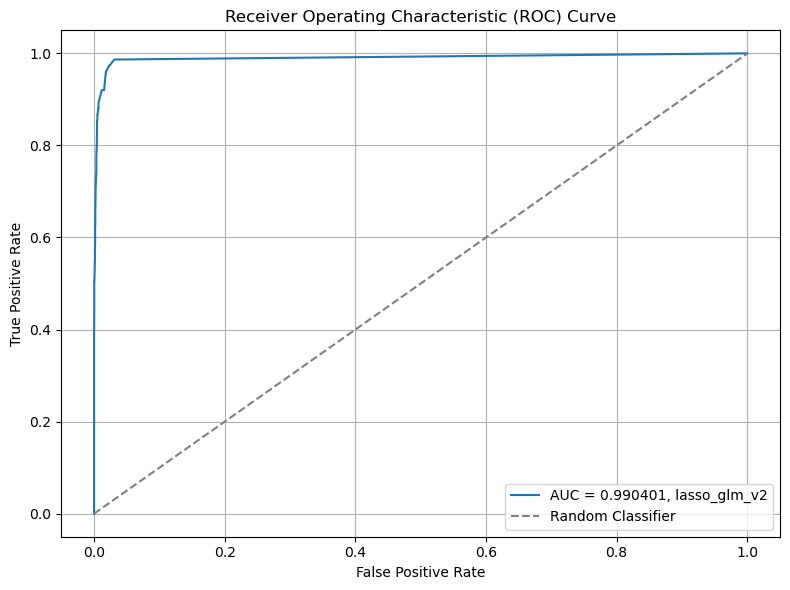

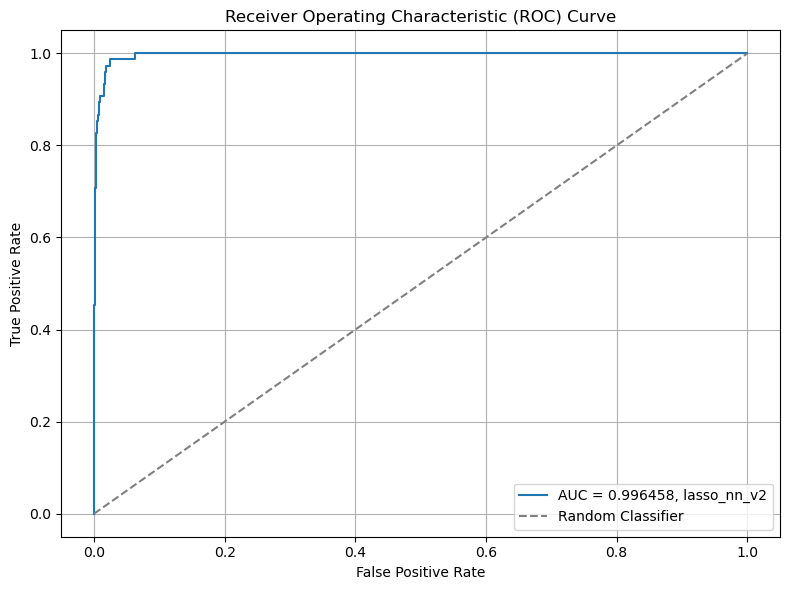

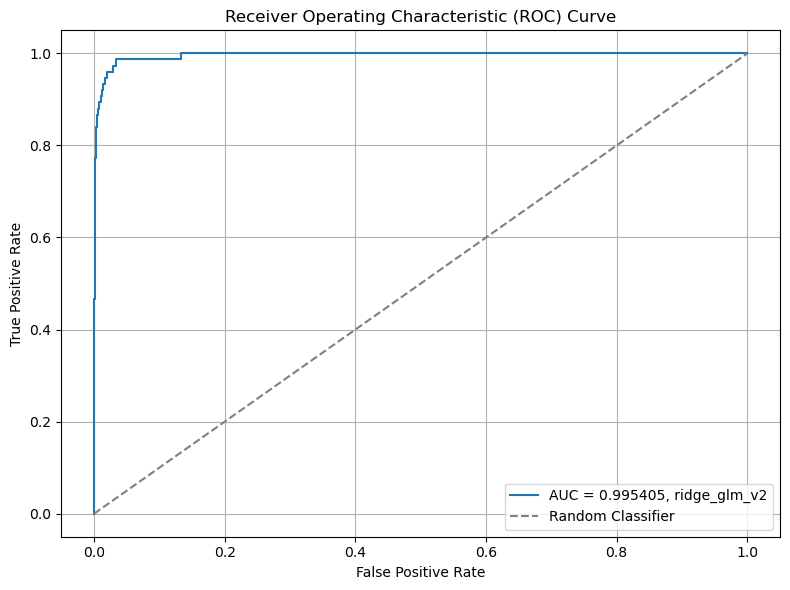

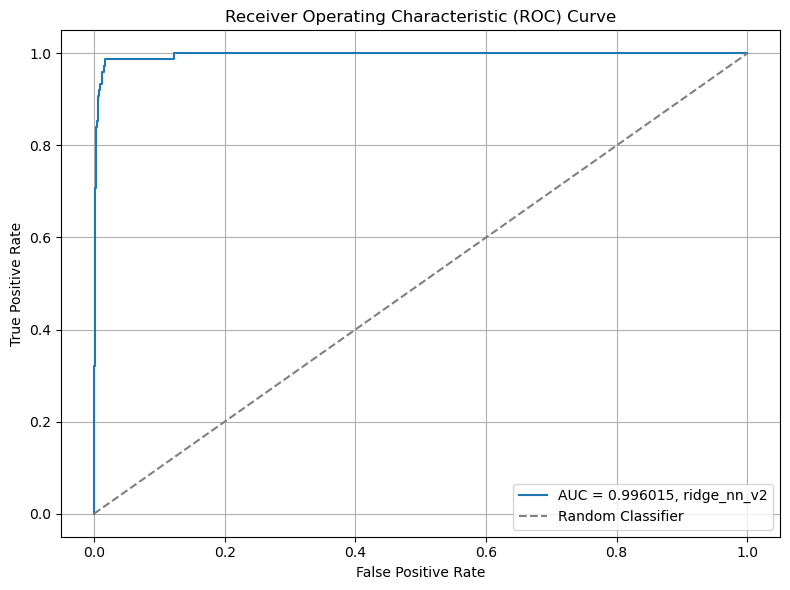

In [36]:
for column in pred_columns:
    plot_roc_curve(summary_person, true_column, column)